<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In [94]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten , MaxPool2D , Conv2D , Dropout
from tensorflow.keras.datasets.mnist import load_data


In [95]:
(x_train , y_train) , (x_test , y_test) = load_data()

In [96]:
x_train.shape

(60000, 28, 28)

In [97]:
x_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , x_train.shape[2] , 1)
x_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , x_test.shape[2] , 1)

In [98]:
x_train.shape

(60000, 28, 28, 1)

In [99]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

In [100]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation="relu" , input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48 , (3,3) , activation="relu" , input_shape=x_train))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500 , activation="relu"))
model.add(Dense(10 , activation="softmax"))

c:\Users\Samir Maleki\OneDrive\Desktop\AI_venv\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics= ["accuracy"]
              )

In [102]:
model.fit(x_train ,
          y_train,
          batch_size=128,
          epochs=10,
          validation_split=0.1,
          verbose=1
          )

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8531 - loss: 0.4736 - val_accuracy: 0.9840 - val_loss: 0.0545
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9767 - loss: 0.0742 - val_accuracy: 0.9862 - val_loss: 0.0494
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9835 - loss: 0.0514 - val_accuracy: 0.9898 - val_loss: 0.0364
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9883 - loss: 0.0369 - val_accuracy: 0.9902 - val_loss: 0.0333
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9903 - loss: 0.0312 - val_accuracy: 0.9910 - val_loss: 0.0312
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9921 - loss: 0.0250 - val_accuracy: 0.9912 - val_loss: 0.0309
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9925 - loss: 0.0207 - val_accuracy: 0.9922 - val_loss: 0.0276
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9940 - loss: 0.0188 - val_accu

In [103]:
model.evaluate(x_test , y_test , verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0298


[0.02335495688021183, 0.9926999807357788]

In [104]:
y_predicted = model.predict(x_test)
np.argmax(y_predicted[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(7)

In [105]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [106]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

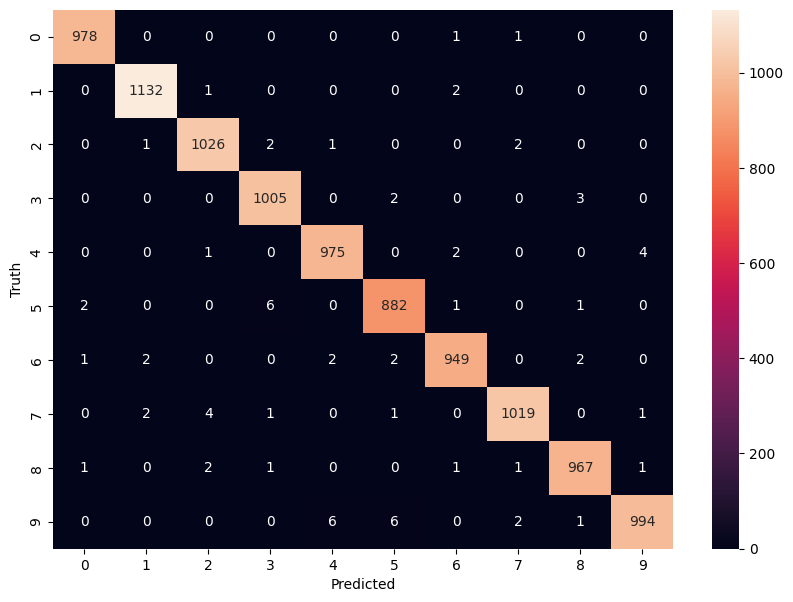

In [107]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')